In [1]:
!pip install warnings
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
#making installations
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scikit-learn
!pip install xgboost
!pip install --upgrade category_encoders

In [17]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import sklearn
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures  
import xgboost as xg 
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor  
from sklearn.cluster import KMeans


In [18]:
# Loading the dataset and checking the first few rows
original_dataset = pd.read_csv('innercity.csv')
# Display the first few rows of the dataset
original_dataset.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [19]:
#creating a copy of the dataset for further processing
df=original_dataset
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,20150427T000000,600000,4.0,1.75,3050.0,9440.0,1,0,0.0,...,1250.0,1966,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490
1,3145600250,20150317T000000,190000,2.0,1.00,670.0,3101.0,1,0,0.0,...,0.0,1948,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771
2,7129303070,20140820T000000,735000,4.0,2.75,3040.0,2415.0,2,1,4.0,...,0.0,1966,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455
3,7338220280,20141010T000000,257000,3.0,2.50,1740.0,3721.0,2,0,0.0,...,0.0,2009,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461
4,7950300670,20150218T000000,450000,2.0,1.00,1120.0,4590.0,1,0,0.0,...,0.0,1924,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710


In [20]:
#basic details of the dataset
print("dataset columns",df.columns)
print("dataset shape",df.shape)
print("row count",df.shape[0])
print("column count",df.shape[1])
print("datatypes")
print(df.dtypes)

dataset columns Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')
dataset shape (21613, 23)
row count 21613
column count 23
datatypes
cid                   int64
dayhours             object
price                 int64
room_bed            float64
room_bath           float64
living_measure      float64
lot_measure         float64
ceil                 object
coast                object
sight               float64
condition            object
quality             float64
ceil_measure        float64
basement            float64
yr_built             object
yr_renovated          int64
zipcode               int64
lat                 float64
long                 object
living_measure15    float64
lot_measure15   

<AxesSubplot:>

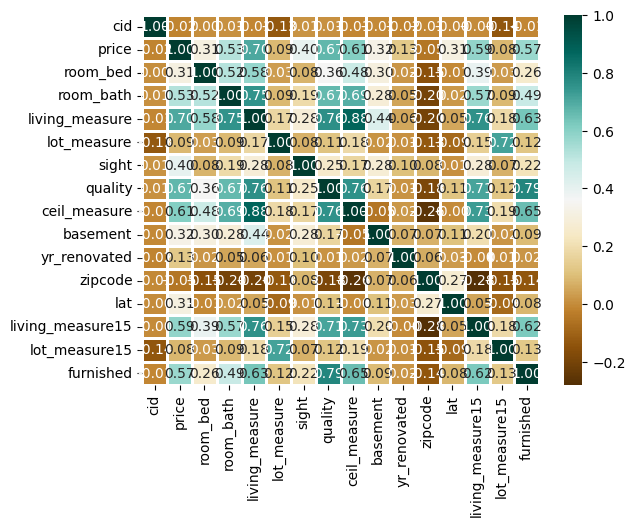

In [21]:
#Correlation analysis of Numerical Features
numerical_dataset=df.select_dtypes(include=['number'])
plt.figure()
sns.heatmap(numerical_dataset.corr(),
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

<AxesSubplot:title={'center':'Unique values of Categorical Features'}, xlabel='None'>

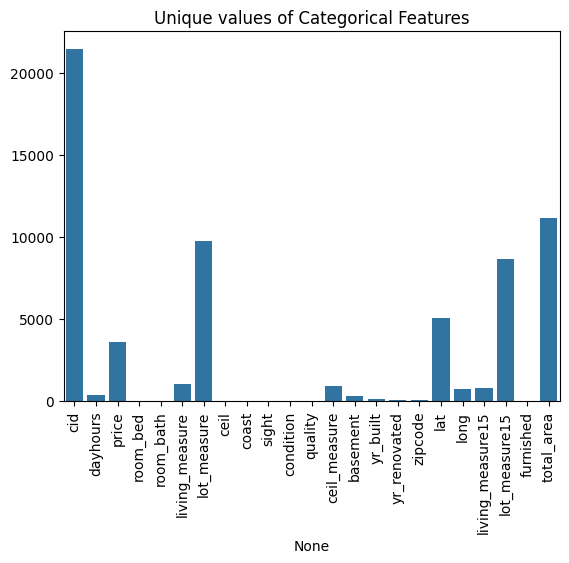

In [22]:
#Unique values of categorical features
unique_values=[]
for col in df.columns:
    unique_values.append(df[col].unique().size)
plt.figure()
plt.title("Unique values of Categorical Features")
plt.xticks(rotation=90)
sns.barplot(x=df.columns,y=unique_values)

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index=1
for col in df.columns:
    y=df[col].value_counts()
    plt.subplot(11,4,index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index),y=y)
    index+=1

In [23]:
#EXPLORATORY DATA ANALYSIS
#Step 1 is to check for null values and handle them
#checking for null values
print(df.isnull().sum())

#handling null values by dropping them
df=df.dropna()

#df without null values
print(df.isnull().sum())

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 42
coast                 1
sight                57
condition            57
quality               1
ceil_measure          1
basement              1
yr_built              1
yr_renovated          0
zipcode               0
lat                   0
long                  0
living_measure15    166
lot_measure15        29
furnished            29
total_area           29
dtype: int64
cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15 

In [24]:
#Step 2 of EDA is to identify duplicate values and drop them
#here we are considering cid as the primary key of the dataset and thus dropping all those columns that have repeated cids
duplicates_validation=df.duplicated(subset=['cid'])
if duplicates_validation.any():
  print("duplicates count",len(df.loc[duplicates_validation]))
  print("non duplicates count",len(df.loc[~duplicates_validation]))
  print(df.loc[duplicates_validation],'\n\n')
  print(df.loc[~duplicates_validation],'\n\n')
  #dropping duplicates
  print("no of rows before dropping duplicates",df.shape[0])
  df.drop_duplicates(subset=['cid'],inplace=True)
  print("no of rows after dropping duplicates",df.shape[0])

duplicates count 176
non duplicates count 21211
              cid         dayhours   price  room_bed  room_bath  \
641    8121100395  20150311T000000  645000       4.0       1.50   
2138   4154300296  20140926T000000  235000       3.0       1.00   
2735   1788900230  20140722T000000   86500       3.0       1.00   
2853   9136103130  20150512T000000  685000       2.0       1.50   
3581   7227800055  20141124T000000  247000       4.0       2.00   
...           ...              ...     ...       ...        ...   
21371  6300000226  20140626T000000  240000       4.0       1.00   
21406  1139600270  20140701T000000  300000       3.0       2.75   
21430  3935900232  20150112T000000  237000       3.0       1.00   
21453  2422049104  20140915T000000   85000       2.0       1.00   
21466  4031000520  20140708T000000  115000       1.0       2.00   

       living_measure  lot_measure ceil coast  sight  ... basement  yr_built  \
641            1600.0       6180.0  1.5     0    0.0  ...      0.0 

C:\Users\Ramya K N\AppData\Local\Temp\ipykernel_28056\909959335.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['cid'],inplace=True)


In [25]:
#Step 3- Encoding categorical variables using target encoding tecnhique to convert them to numerical values that can be fed to our models

#split the dataset into features and results
X = df.drop(['price'],axis=1)
y = df['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#extract the categorical columns
cat_cols=X.select_dtypes(exclude=['number'])
# print("category",cat_cols)

# Initialize and fit the target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
encoder.fit(X_train, y_train)

#Transform both training and testing sets
X_train_encoded = encoder.transform(X_train)
X_test_encoded = encoder.transform(X_test)


print(X_train_encoded.shape)
print(y_train.shape)

#removing null values from the encoded datasets
X_train_encoded = X_train_encoded.replace(np.nan, 0)
X_test_encoded=X_test_encoded.replace(np.nan,0)


(16968, 22)
(16968,)


In [26]:
#EVALUATION TECHNIQUES TO BE USED
#Root mean squared error
#Mean absolute percentage error
#Rsquared
#adjusted r squared

#Evaluate the linear regression model

#ROOT MEAN SQUARED ERROR


def get_rmse(y_test,y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse=math.sqrt(mse)
    return rmse

def get_mape(y_test,y_pred):
    mape=mean_absolute_percentage_error(y_test,y_pred,sample_weight=None, multioutput='uniform_average')
    return mape
    
def get_r2_score(y_test,y_pred):
    model_r2_score=sklearn.metrics.r2_score(y_test, y_pred)
    return model_r2_score

def get_adjusted_r2_score(y_test,y_pred,x_test):
    model_r2_score=sklearn.metrics.r2_score(y_test, y_pred)
    n=len(x_test)
    # p=len(x_test[0])
    p=10
    adjusted_r2_score=1-((1-model_r2_score)*((n-1)/(n-p-1)))
    return adjusted_r2_score


In [27]:
#FUNCTION TO PLOT THE FINAL GRAPH
def plot_final_graph(y_test,y_pred,model_type):
    fig=plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle(f'y_test vs y_pred for {model_type}',fontsize=18)
    plt.xlabel('y_test',fontsize=18)
    plt.ylabel('y_pred',fontsize=16)

ROOT MEAN SQUARED ERROR OF LINEAR REGRESSION IS : 213459.73687161598
MEAN ABSOLUTE PERCENTAGE ERROR OF LINEAR REGRESSION IS : 0.2580427943512471
R2 SCORE OF LINEAR REGRESSION IS : 0.6399982260901269
ADJUSTED R2 SCORE OF LINEAR REGRESSION IS : 0.6391475602727594


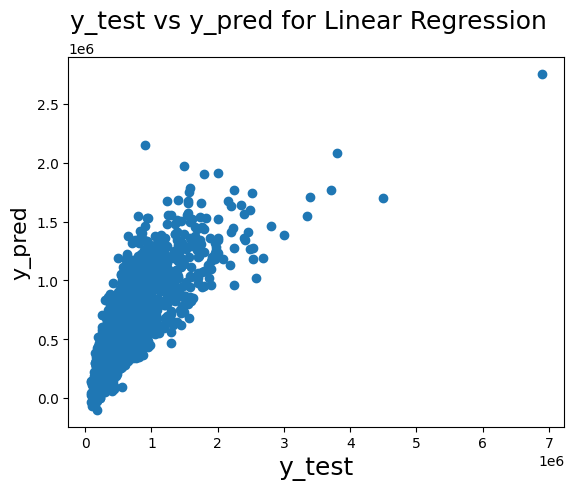

In [28]:
#we have preprocessed data now, the following variables can be used
# X_train_encoded and y_train for training
# X_test_encoded for testing
# y_test for model evaluation

#Perform RFE to select the top 10 features for the algorithms

#MODEL BUILDING BEGINS HERE.
#models to be built are
# Parametric models
# 1.Linear Regression
# 2. Lasso Regression
# 3. Ridge Regression'

# Non Parametric models
# 1. RF Regression
# 2. Decision Tree Regression
# 3. XGBoost Regression
# 4. ADABoost Regression

#All models will be trained after choosing the top best number of features usinf RFE algorithm

#LINEAR REGRESSION MODEL
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train_encoded, y_train)
# selector.support_
# selector.ranking_
y_pred=selector.predict(X_test_encoded)


#EVALUATION TECHNIQUES TO BE USED
#Root mean squared error
#Mean absolute percentage error
#Rsquared
#adjusted r squared

#Evaluate the linear regression model

#ROOT MEAN SQUARED ERROR
rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF LINEAR REGRESSION IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF LINEAR REGRESSION IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF LINEAR REGRESSION IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF LINEAR REGRESSION IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"Linear Regression")


c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.014e+14, tolerance: 2.343e+11
  model = cd_fast.enet_coordinate_descent(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.014e+14, tolerance: 2.343e+11
  model = cd_fast.enet_coordinate_descent(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, chec

ROOT MEAN SQUARED ERROR OF LASSO REGRESSION IS : 213459.71257290934
MEAN ABSOLUTE PERCENTAGE ERROR OF LASSO REGRESSION IS : 0.2580396633076863
R2 SCORE OF LASSO REGRESSION IS : 0.6399983080500987
ADJUSTED R2 SCORE OF LASSO REGRESSION IS : 0.6391476424263985


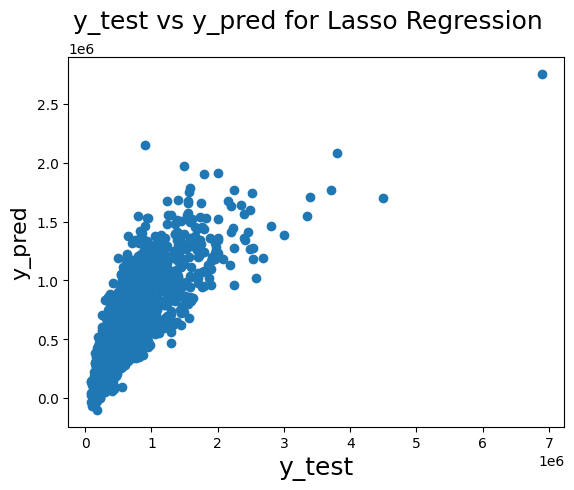

In [16]:
#LASSO REGRESSION MODEL
estimator = Lasso(alpha=1.0)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train_encoded, y_train)
# selector.support_
# selector.ranking_
y_pred=selector.predict(X_test_encoded)

#EVALUATION TECHNIQUES TO BE USED
#Root mean squared error
#Mean absolute percentage error
#Rsquared
#adjusted r squared

#Evaluate the linear regression model

#ROOT MEAN SQUARED ERROR
rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF LASSO REGRESSION IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF LASSO REGRESSION IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF LASSO REGRESSION IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF LASSO REGRESSION IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"Lasso Regression")


c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.09177e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


ROOT MEAN SQUARED ERROR OF RIDGE REGRESSION IS : 212540.26254617036
MEAN ABSOLUTE PERCENTAGE ERROR OF RIDGE REGRESSION IS : 0.2564043599637101
R2 SCORE OF RIDGE REGRESSION IS : 0.6430929499742792
ADJUSTED R2 SCORE OF RIDGE REGRESSION IS : 0.6422495968314963


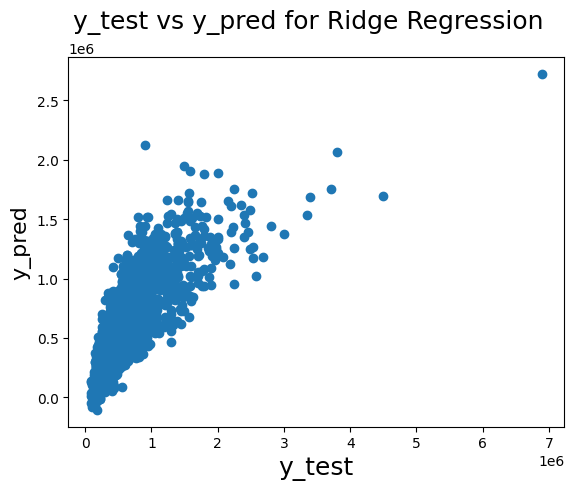

In [29]:
#RIDGE REGRESSION MODEL
estimator = Ridge(alpha=1.0)
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(X_train_encoded, y_train)
# selector.support_
# selector.ranking_
y_pred=selector.predict(X_test_encoded)


#EVALUATION TECHNIQUES TO BE USED
#Root mean squared error
#Mean absolute percentage error
#Rsquared
#adjusted r squared

#Evaluate the linear regression model

#ROOT MEAN SQUARED ERROR
rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF RIDGE REGRESSION IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF RIDGE REGRESSION IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF RIDGE REGRESSION IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF RIDGE REGRESSION IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"Ridge Regression")


c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\u

ROOT MEAN SQUARED ERROR OF RANDOM FOREST REGRESSION IS : 240555.75021981826
MEAN ABSOLUTE PERCENTAGE ERROR OF RANDOM FOREST REGRESSION IS : 0.20467473432820205
R2 SCORE OF RANDOM FOREST REGRESSION IS : 0.5428021423906061
ADJUSTED R2 SCORE OF RANDOM FOREST REGRESSION IS : 0.5417218071883154


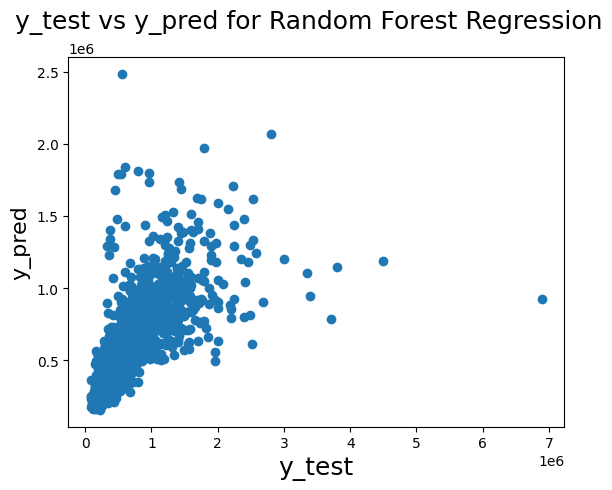

In [30]:
# Fitting Random Forest Regression to the dataset
estimator = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the regressor with x and y data
selector = selector.fit(X_train_encoded, y_train)

y_pred=selector.predict(X_test_encoded)

rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF RANDOM FOREST REGRESSION IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF RANDOM FOREST REGRESSION IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF RANDOM FOREST REGRESSION IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF RANDOM FOREST REGRESSION IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"Random Forest Regression")


c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src

ROOT MEAN SQUARED ERROR OF XG BOOST REGRESSOR IS : 227900.35220380008
MEAN ABSOLUTE PERCENTAGE ERROR OF XG BOOST REGRESSOR IS : 0.20243180486597526
R2 SCORE OF XG BOOST REGRESSOR IS : 0.5896422266960144
ADJUSTED R2 SCORE OF XG BOOST REGRESSOR IS : 0.5886725722222337


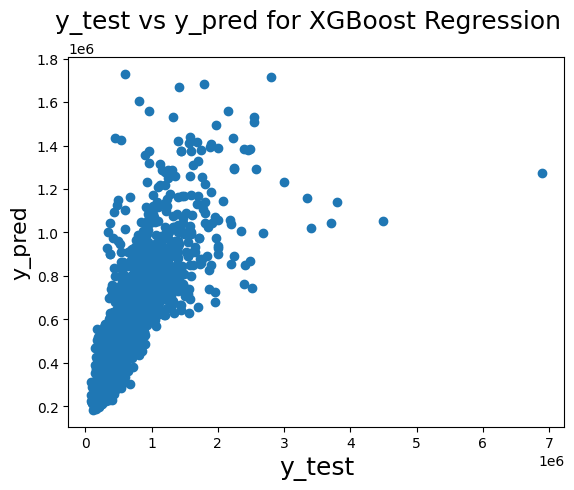

In [30]:
#XGBoost Regression Model
estimator = xg.XGBRegressor(objective ='reg:linear', 
                  n_estimators = 10, seed = 123) 
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the regressor with x and y data
selector = selector.fit(X_train_encoded, y_train)

y_pred=selector.predict(X_test_encoded)

rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF XG BOOST REGRESSOR IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF XG BOOST REGRESSOR IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF XG BOOST REGRESSOR IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF XG BOOST REGRESSOR IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"XGBoost Regression")


c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\users\ramya k n\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the 

ROOT MEAN SQUARED ERROR OF ADA BOOST REGRESSOR IS : 375109.73165594717
MEAN ABSOLUTE PERCENTAGE ERROR OF ADA BOOST REGRESSOR IS : 0.40446618027073916
R2 SCORE OF ADA BOOST REGRESSOR IS : -0.11170450122827535
ADJUSTED R2 SCORE OF ADA BOOST REGRESSOR IS : -0.11433140222361637


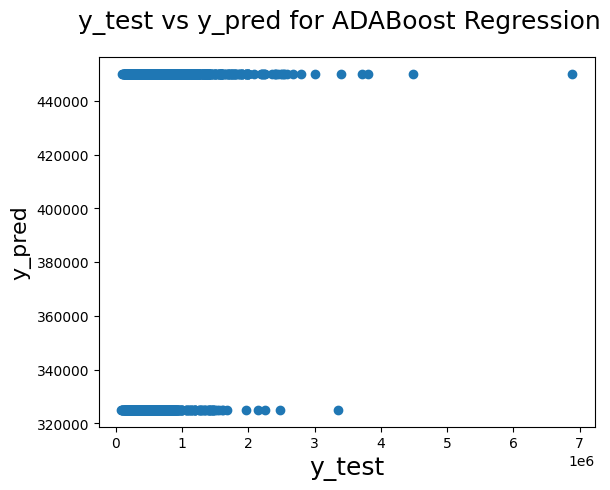

In [15]:
#ADABoost Regression Model
estimator = AdaBoostClassifier()
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the regressor with x and y data
selector = selector.fit(X_train_encoded, y_train)

y_pred=selector.predict(X_test_encoded)

rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF ADA BOOST REGRESSOR IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF ADA BOOST REGRESSOR IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF ADA BOOST REGRESSOR IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF ADA BOOST REGRESSOR IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"ADABoost Regression")


ROOT MEAN SQUARED ERROR OF DECISION TREE REGRESSOR IS : 261421.86380394164
MEAN ABSOLUTE PERCENTAGE ERROR OF DECISION TREE REGRESSOR IS : 0.2435562133435047
R2 SCORE OF DECISION TREE REGRESSOR IS : 0.4600463086612018
ADJUSTED R2 SCORE OF DECISION TREE REGRESSOR IS : 0.45877042564764126


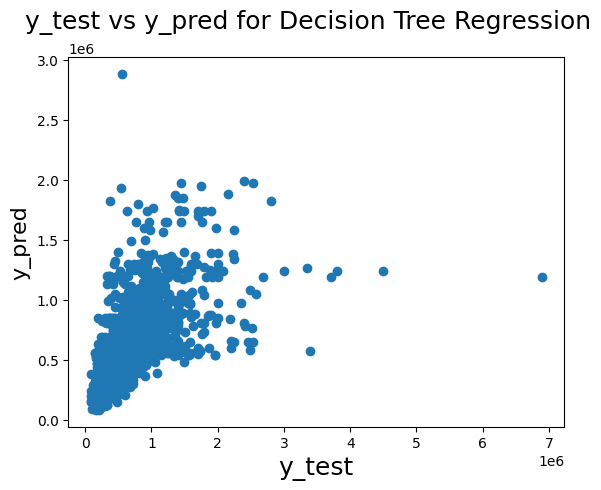

In [31]:
#Decision Tree Regression
estimator = DecisionTreeRegressor(random_state = 0)  
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the regressor with x and y data
selector = selector.fit(X_train_encoded, y_train)

y_pred=selector.predict(X_test_encoded)

rmse=get_rmse(y_test,y_pred)
print("ROOT MEAN SQUARED ERROR OF DECISION TREE REGRESSOR IS :",rmse)
mape=get_mape(y_test,y_pred)
print("MEAN ABSOLUTE PERCENTAGE ERROR OF DECISION TREE REGRESSOR IS :",mape)
r2_score=get_r2_score(y_test,y_pred)
print("R2 SCORE OF DECISION TREE REGRESSOR IS :",r2_score)
adjusted_r2_score=get_adjusted_r2_score(y_test,y_pred,X_test_encoded)
print("ADJUSTED R2 SCORE OF DECISION TREE REGRESSOR IS :",adjusted_r2_score)

#PLOT THE GRAPH
plot_final_graph(y_test,y_pred,"Decision Tree Regression")
